In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [40]:
def auto_corr(data,lags):
    # convert input data into a numpy array
    data = np.array(data)
    # acf will store the autocorreltion coefficent at each lag interval
    # the first datapoint is always 1.0 since anything correlated with itsself is = 1
    acf = [1.0]
    # calculate the mean for the entire dataset
    y_bar = data.mean()
    print("The mean of this dataset is: ",y_bar)
    # subtract the mean from each observation
    yy_bar = data - y_bar
    # clacualte the total variance for the data set
    total_variance = sum(np.square(yy_bar))
    print("The total variance for this dataset is: ", total_variance)
    # perform a forloop over the dataset with the desired number of lags
    # range is 1,lags b/c the first iteration calcualtes T1
    for i in range(1,lags):
        # first nparray is removing the last element each iteration
        yy_bar_bottom = yy_bar[:-i]
        # second nparray removes the first element each interation
        yy_bar_top = yy_bar[i:]
        # take the sum of of the product of each nparray each iteration
        yy = sum(yy_bar_top * yy_bar_bottom)
        # divide the sum by total variance and append to resulting acf list
        acf.append(yy/total_variance)
    return acf

In [60]:
def acf_plot(y):
    #y = y.tolist()
    y_rev = y[::-1]
    y_rev.extend(y[1:])
    print(len(y_rev))
    return y_rev

In [61]:
# Test data
y = [1.5,2.1,3.9,4.4,5.2]

In [62]:
def average(y,start,end):
    # data is a list with only the first two values
    data = y[:start]
    data1 = data
    print("True values: ",data)
    # Single iteration to grab the average of current values in data1
    for i in range(0,1):
        pred = sum(data1)/len(data1)
        # append the sum of data1 back to data1
        data1.append(pred)
        print("True values with Predicted Value: ", data1)
    # calculate error
    print("True Value: ",y[start])
    print("Predicted Value: ",data1[-1])
    forcast_error = y[start] - data1[-1]
    print("Forcast Error: ",forcast_error)
    # convert list into numpy array for plotting
    dt_plt = np.array(data1)
    # create a numpy array for plotting the time steps at 1
    x = np.array(list(range(1,end)))
    # set conditions so that the predicted value is red
    col = np.where(x <= start,'k',np.where(dt_plt > start,'r','r'))
    # Plot the true values and predicted value
    plt.scatter(x,dt_plt,c=col, s=60,linewidth=0)
    plt.xlabel("Time-Step",fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.title("Average Method Estimation y{}".format(start+1),fontsize=18)
    
    legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'k',
                              label='True Values',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Prediction',
                          markerfacecolor='r', markersize=12)]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.show()
    return forcast_error

True values:  [1.5, 2.1]
True values with Predicted Value:  [1.5, 2.1, 1.8]
True Value:  3.9
Predicted Value:  1.8
Forcast Error:  2.0999999999999996


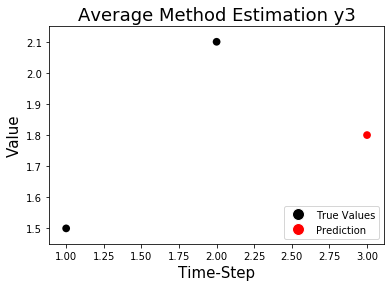

In [63]:
avg_e1 = average(y,2,4)

True values:  [1.5, 2.1, 3.9]
True values with Predicted Value:  [1.5, 2.1, 3.9, 2.5]
True Value:  4.4
Predicted Value:  2.5
Forcast Error:  1.9000000000000004


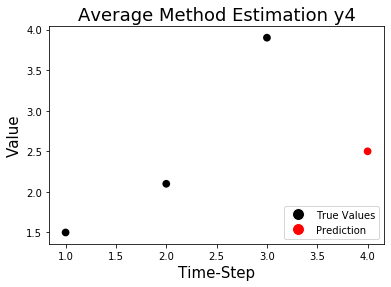

In [64]:
avg_e2 = average(y,3,5)

True values:  [1.5, 2.1, 3.9, 4.4]
True values with Predicted Value:  [1.5, 2.1, 3.9, 4.4, 2.975]
True Value:  5.2
Predicted Value:  2.975
Forcast Error:  2.225


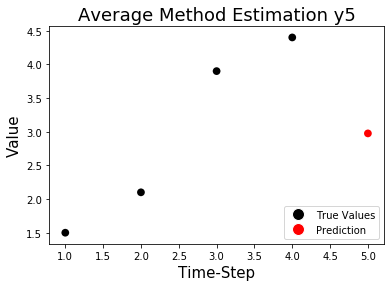

In [65]:
avg_e3 = average(y,4,6)

In [115]:
def error_stats(mt,x,n,h):
    mean_error = x.mean()
    print("The mean of forcast error is = ", mean_error)
    sse = sum((x) ** 2)
    print("The SSE of forcast error is =", sse)
    variance_error = sum((x - mean_error) ** 2)/n
    print("The variance of forcast error is = ",variance_error)
    mse = sse/n
    print("MSE is of the forcast error is = ", mse)
    acf = auto_corr(x,h)
    print("ACF of the forcast errors is = ", acf)
    Q = -1
    for i in acf:
        Q += i**2
    Q = n*Q
    print("Q value estimate is = ", Q)
    method = mt
    return method,mean_error,sse,variance_error,mse,acf,Q    

In [116]:
avg_errors = np.array([avg_e1,avg_e2,avg_e3])

In [117]:
avg_es = error_stats("Average",avg_errors,3,3)

The mean of forcast error is =  2.0749999999999997
The SSE of forcast error is = 12.970625
The variance of forcast error is =  0.017916666666666626
MSE is of the forcast error is =  4.323541666666666
The mean of this dataset is:  2.0749999999999997
The total variance for this dataset is:  0.05374999999999988
ACF of the forcast errors is =  [1.0, -0.5697674418604652, 0.06976744186046518]
Q value estimate is =  0.9885073012439162


In [122]:
# Naive Method

def niave(y,start,end):
    # data is a list with only the first two values
    data = y[:start]
    data1 = data
    print("True values: ",data)
    # Single iteration to grab the average of current values in data1
    for i in range(0,1):
        pred = data1[-1]
        # append the sum of data1 back to data1
        data1.append(pred)
        print("True values with Predicted Value: ", data1)
    # calculate error
    print("True Value: ",y[start])
    print("Predicted Value: ",data1[-1])
    forcast_error = y[start] - data1[-1]
    print("Forcast Error: ",forcast_error)
    # convert list into numpy array for plotting
    dt_plt = np.array(data1)
    # create a numpy array for plotting the time steps at 1
    x = np.array(list(range(1,end)))
    # set conditions so that the predicted value is red
    col = np.where(x <= start,'k',np.where(dt_plt > start,'r','r'))
    # Plot the true values and predicted value
    plt.scatter(x,dt_plt,c=col, s=60,linewidth=0)
    plt.xlabel("Time-Step",fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.title("Naive Method Estimation y{}".format(start+1),fontsize=18)
    
    legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'k',
                              label='True Values',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Prediction',
                          markerfacecolor='r', markersize=12)]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.show()
    return forcast_error

True values:  [1.5, 2.1]
True values with Predicted Value:  [1.5, 2.1, 2.1]
True Value:  3.9
Predicted Value:  2.1
Forcast Error:  1.7999999999999998


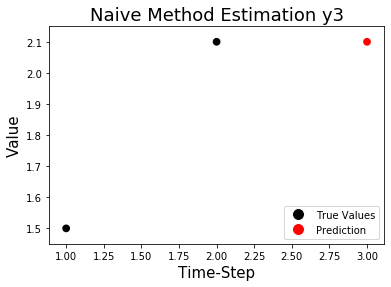

In [123]:
n_e1 = niave(y,2,4)

True values:  [1.5, 2.1, 3.9]
True values with Predicted Value:  [1.5, 2.1, 3.9, 3.9]
True Value:  4.4
Predicted Value:  3.9
Forcast Error:  0.5000000000000004


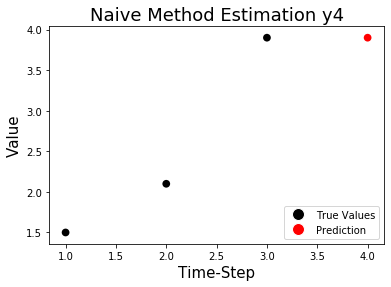

In [71]:
n_e2 = niave(y,3,5)

True values:  [1.5, 2.1, 3.9, 4.4]
True values with Predicted Value:  [1.5, 2.1, 3.9, 4.4, 4.4]
True Value:  5.2
Predicted Value:  4.4
Forcast Error:  0.7999999999999998


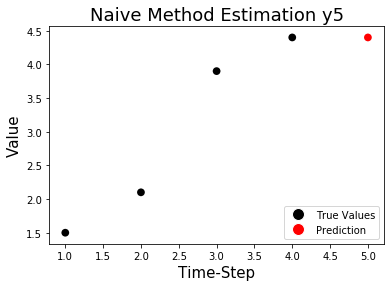

In [72]:
n_e3 = niave(y,4,6)

In [73]:
niave_errors = np.array([n_e1,n_e2,n_e3])

In [124]:
nv_es = error_stats("Niave",niave_errors,3,3)

The mean of forcast error is =  1.0333333333333334
The SSE of forcast error is = 4.129999999999999
The variance of forcast error is =  0.3088888888888887
MSE is of the forcast error is =  1.3766666666666663
The mean of this dataset is:  1.0333333333333334
The total variance for this dataset is:  0.9266666666666661
ACF of the forcast errors is =  [1.0, -0.306954436450839, -0.19304556354916097]
Q value estimate is =  0.3944628469885959


In [259]:
def drift(y,end,h):
    T = y[:end]
    y_t = T[-1]
    y0 = y[0]
    data1 = T
    Tt = len(T)
    Tt = Tt - 1
    yhat = y_t + (h*((y_t - y0)/Tt))
    print("Y hat = ",yhat)
    data1.append(yhat)
    print("True Value:",y[end])
    error = y[end] - yhat
    print("Error = ",error)
    # convert list into numpy array for plotting
    dt_plt = np.array(data1)
    # create a numpy array for plotting the time steps at 1
    x = np.array(list(range(1,end+2)))
    # set conditions so that the predicted value is red
    col = np.where(x <= end,'k',np.where(dt_plt > end,'r','r'))
    # Plot the true values and predicted value
    plt.scatter(x,dt_plt,c=col, s=60,linewidth=0)
    plt.xlabel("Time-Step",fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.title("Drift Method Estimation y{}".format(end+1),fontsize=18)
    
    legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'k',
                              label='True Values',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Prediction',
                          markerfacecolor='r', markersize=12)]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.show()
    return error   

Y hat =  2.7
True Value: 3.9
Error =  1.1999999999999997


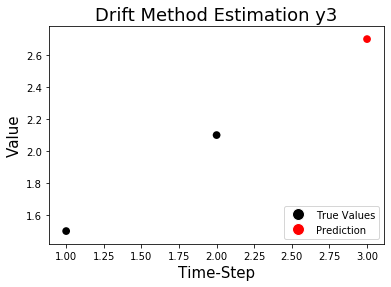

In [260]:
d_e1 = drift(y,2,1)

Y hat =  5.1
True Value: 4.4
Error =  -0.6999999999999993


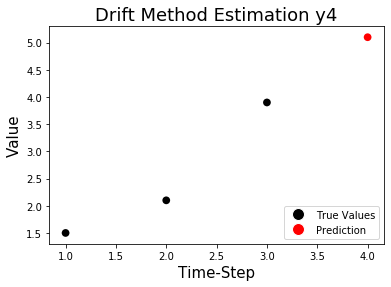

In [261]:
d_e2 = drift(y,3,1)

Y hat =  5.366666666666667
True Value: 5.2
Error =  -0.16666666666666696


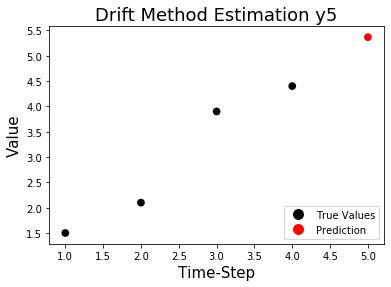

In [262]:
d_e3 = drift(y,4,1)

In [164]:
drift_errors = np.array([d_e1,d_e2,d_e3])

In [166]:
dft_es = error_stats("Drift",drift_errors,3,3)

The mean of forcast error is =  0.11111111111111116
The SSE of forcast error is = 1.9577777777777763
The variance of forcast error is =  0.6402469135802464
MSE is of the forcast error is =  0.6525925925925921
The mean of this dataset is:  0.11111111111111116
The total variance for this dataset is:  1.9207407407407393
ACF of the forcast errors is =  [1.0, -0.34252474611132505, -0.1574752538886749]
Q value estimate is =  0.4263649718577909


In [225]:
# Make the function for SES
def ses(y,end,l0,alpha):
    # calculate y_hat
    # calcualte l1
    li1 = y[0]*alpha
    li_1 = [l0,li1]     
    for i in range(1,len(y)):
        li = alpha*y[i] + ((1-alpha)*li_1[i])
        li_1.append(li)
    y_hat = li_1
    # calculate errors
    error = []
    for i in range(2,5):
        ei = y[i] - y_hat[i]
        print(y[i],y_hat[i])
        error.append(ei)
    print("Forcaste: ",y_hat[end])
    dt_plt = y[:end]
    y_hat_plt = y_hat[end]
    dt_plt.append(y_hat_plt)
    # convert lists into numpy arrays for plotting
    dt_plt = np.array(dt_plt)
    print("Plotting Points", dt_plt)
    # create a numpy array for plotting the time steps at 1
    x = np.array(list(range(1,end+2)))
    #set conditions so that the predicted value is red
    col = np.where(x <= end,'k',np.where(dt_plt > end,'r','r'))
    # Plot the true values and predicted value
    plt.scatter(x,dt_plt,c=col, s=60,linewidth=0)
    plt.xlabel("Time-Step",fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.title("SES Method Estimation y{}".format(end+1),fontsize=18)
    
    legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'k',
                              label='True Values',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Prediction',
                          markerfacecolor='r', markersize=12)]
    plt.legend(handles=legend_elements, loc='best')
    plt.show()
    return y_hat,error

3.9 1.425
4.4 2.6625
5.2 3.53125
Forcaste:  1.425
Plotting Points [1.5   2.1   1.425]


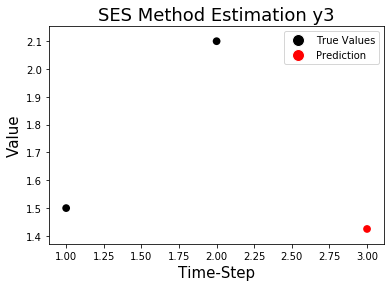

([0, 0.75, 1.425, 2.6625, 3.53125, 4.365625],
 [2.4749999999999996, 1.7375000000000003, 1.6687500000000002])

In [226]:
ses(y,2,0,0.5)

3.9 1.425
4.4 2.6625
5.2 3.53125
Forcaste:  2.6625
Plotting Points [1.5    2.1    3.9    2.6625]


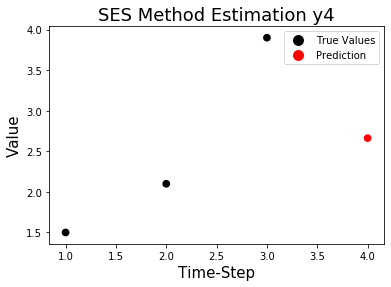

([0, 0.75, 1.425, 2.6625, 3.53125, 4.365625],
 [2.4749999999999996, 1.7375000000000003, 1.6687500000000002])

In [227]:
ses(y,3,0,0.5)

3.9 1.425
4.4 2.6625
5.2 3.53125
Forcaste:  3.53125
Plotting Points [1.5     2.1     3.9     4.4     3.53125]


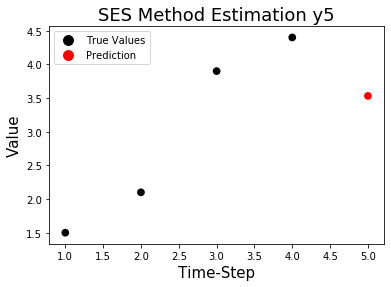

In [242]:
error = ses(y,4,0,0.5)

In [243]:
# Only need to look at the last three errors
error = error[1]

In [244]:
error = np.array(error)

In [245]:
ses_es = error_stats("SES",error,3,3)

The mean of forcast error is =  1.960416666666667
The SSE of forcast error is = 11.929257812500001
The variance of forcast error is =  0.1331857638888887
MSE is of the forcast error is =  3.976419270833334
The mean of this dataset is:  1.960416666666667
The total variance for this dataset is:  0.3995572916666661
ACF of the forcast errors is =  [1.0, -0.12436724673575333, -0.37563275326424667]
Q value estimate is =  0.46970153215653054


In [246]:
avg_eafc = avg_es[5]
avg_acf_plt = acf_plot(avg_eafc)

5


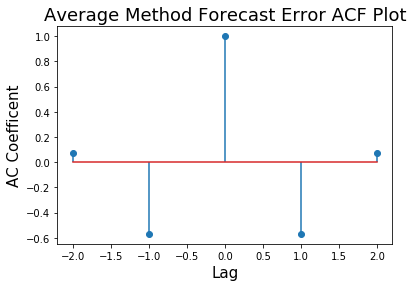

In [247]:
x = np.array(list(range(-2,3)))
figure = plt.stem(x,avg_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('Average Method Forecast Error ACF Plot',fontsize=18)
plt.show()

In [248]:
nv_eafc = nv_es[5]
nv_acf_plt = acf_plot(nv_eafc)

5


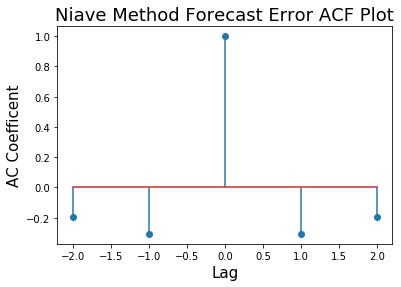

In [249]:
x = np.array(list(range(-2,3)))
figure = plt.stem(x,nv_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('Niave Method Forecast Error ACF Plot',fontsize=18)
plt.show()

In [250]:
dft_eafc = dft_es[5]
dft_acf_plt = acf_plot(dft_eafc)

5


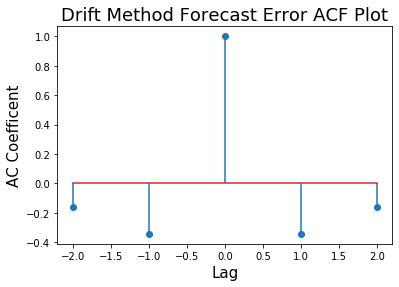

In [251]:
x = np.array(list(range(-2,3)))
figure = plt.stem(x,dft_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('Drift Method Forecast Error ACF Plot',fontsize=18)
plt.show()

In [252]:
ses_eafc = ses_es[5]
ses_acf_plt = acf_plot(ses_eafc)

5


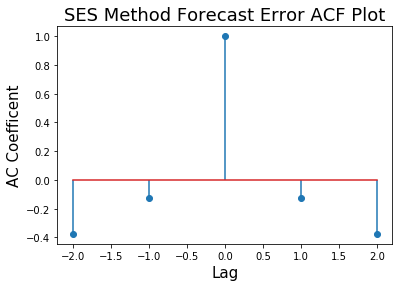

In [253]:
x = np.array(list(range(-2,3)))
figure = plt.stem(x,ses_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('SES Method Forecast Error ACF Plot',fontsize=18)
plt.show()

In [254]:
fm_eval = np.array([avg_es,nv_es,dft_es,
                  ses_es])

In [255]:
fm_eval

array([['Average', 2.0749999999999997, 12.970625, 0.017916666666666626,
        4.323541666666666,
        list([1.0, -0.5697674418604652, 0.06976744186046518]),
        0.9885073012439162],
       ['Niave', 1.0333333333333334, 4.129999999999999,
        0.3088888888888887, 1.3766666666666663,
        list([1.0, -0.306954436450839, -0.19304556354916097]),
        0.3944628469885959],
       ['Drift', 0.11111111111111116, 1.9577777777777763,
        0.6402469135802464, 0.6525925925925921,
        list([1.0, -0.34252474611132505, -0.1574752538886749]),
        0.4263649718577909],
       ['SES', 1.960416666666667, 11.929257812500001, 0.1331857638888887,
        3.976419270833334,
        list([1.0, -0.12436724673575333, -0.37563275326424667]),
        0.46970153215653054]], dtype=object)

In [256]:
df_f = pd.DataFrame(data=fm_eval)

In [257]:
df_f

,0,1,2,3,4,5,6
0,Average,2.075,12.9706,0.0179167,4.32354,"[1.0, -0.5697674418604652, 0.06976744186046518]",0.988507
1,Niave,1.03333,4.13,0.308889,1.37667,"[1.0, -0.306954436450839, -0.19304556354916097]",0.394463
2,Drift,0.111111,1.95778,0.640247,0.652593,"[1.0, -0.34252474611132505, -0.1574752538886749]",0.426365
3,SES,1.96042,11.9293,0.133186,3.97642,"[1.0, -0.12436724673575333, -0.37563275326424667]",0.469702


In [258]:
df_f.rename(columns={0: "Mehtod", 1: "Mean Error",2: "SSE", 3: "Variance", 4: "MSE",5:"ACF", 6: "Q"})

,Mehtod,Mean Error,SSE,Variance,MSE,ACF,Q
0,Average,2.075,12.9706,0.0179167,4.32354,"[1.0, -0.5697674418604652, 0.06976744186046518]",0.988507
1,Niave,1.03333,4.13,0.308889,1.37667,"[1.0, -0.306954436450839, -0.19304556354916097]",0.394463
2,Drift,0.111111,1.95778,0.640247,0.652593,"[1.0, -0.34252474611132505, -0.1574752538886749]",0.426365
3,SES,1.96042,11.9293,0.133186,3.97642,"[1.0, -0.12436724673575333, -0.37563275326424667]",0.469702
